# Começando


In [64]:
import matplotlib.pyplot as plt
import pandas as pd 
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## Pegando dados

In [65]:
dados_csv = pd.read_csv("population_by_country_2020.csv")
x1_csv, x2_csv, y_csv = dados_csv["Population (2020)"], dados_csv["Density (P/Km²)"], dados_csv["Land Area (Km²)"]

x1, x2, y = [], [], []

for i in range(x1_csv.shape[0]):
    x1.append(x1_csv[i])
    x2.append(x2_csv[i])
    y.append(y_csv[i])

# 1) 

## a)Faça o gráfico de dispersão bidimensional (XY) entre a variável y e cada uma das variáveis
regressoras X1,..., Xp (p gráficos separados)

### Gráfico do Conjunto de Dados X1Y

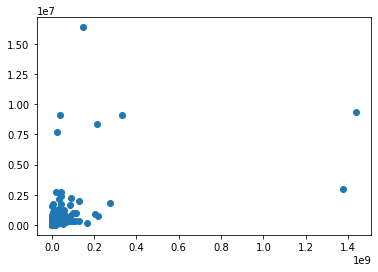

In [66]:
plt.scatter(x1,y)

### Gráfico do Conjunto de Dados X2Y

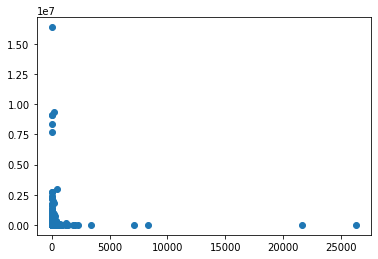

In [67]:
plt.scatter(x2,y)

## b) Estime a correlação entre a variável Y e cada uma das variáveis regressoras (ρ(Y,Xi)). Comente.

### Função de Coeficiente de Correlação

In [68]:
def CoeficienteCorrelacao(x, y):
  Sx = 0
  Sy = 0
  Sxy = 0
  Sxx = 0
  Syy = 0
  x_x_med = []
  y_y_med = []
  xx = []
  yy = []
  xy = []

  for i in range(len(x)):
      Sx += x[i]
      Sy += y[i]
  x_med = Sx/len(x)
  y_med = Sy/len(y)

  for i in range(len(x)):
      x_x_med.append((x[i] - x_med))
      y_y_med.append((y[i] - y_med))

  for i in range(len(x)):
      xx.append(x_x_med[i]**2)
      yy.append(y_y_med[i]**2)
      xy.append(y_y_med[i]*x_x_med[i])

  # Calculo do Rho
  for i in range(len(x)):
      Sxy += xy[i]
      Sxx += xx[i]
      Syy += yy[i]
  
  return { 'rho': Sxy / math.sqrt(Sxx*Syy), 'sxx': Sxx, 'sxy': Sxy, 'xMed': x_med, 'yMed': y_med} # RHO


### Correlação entre X1 e Y
(Lmebrando que esse valor é esperado entre -1 e 1)

In [69]:
x1_rho = CoeficienteCorrelacao(x1,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x1_rho}")

O valor da correlação entre X1 e Y é: 0.4557444362371723


Comentário do resultado:<br>
O valor da correlação entre x1 e y nos mostra que a possivel relação linear existente entre x1 e y tem uma tendência positiva porém não tão grande (próxima a 0.5)

### Correlação entre X2 e Y

In [70]:
x2_rho = CoeficienteCorrelacao(x2,y)['rho']
print(f"O valor da correlação entre X1 e Y é: {x2_rho}")

O valor da correlação entre X1 e Y é: -0.058765963020454726


Comentário do resultado:<br>
O valor da correlação entre x2 e y nos mostra que a possível relação linear existente entra x2 e y tem uma tendência negativa porém quase linear sem "sinal" pois é muito próxima a 0. 

## c) Calcule o coeficiente de determinação R²(Y,Xi) entre a variável Y e cada uma das variáveis regressoras. Comente o resultado.

### Coeficiente de Determinação entre X1 e Y
Valor esperado entre 0 e 1 (Que diz quantos % da variabilidade de y é explicada por xi)

In [71]:
coefDeterminationX1 = math.pow(x1_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX1}")

O valor do coeficiente da determinação entre X1 e Y é: 0.20770299116113802


Comentário do resultado:<br>
Com os dados escolhidos percebemos que pouco da variabilidade de y é explicada ou influênciada pelas variáveis regressoras, no caso de x1 apenas 20% dessa variabilidade.

### Coeficiente de Determinação entre X2 e Y

In [72]:
coefDeterminationX2 = math.pow(x2_rho, 2)
print(f"O valor do coeficiente da determinação entre X1 e Y é: {coefDeterminationX2}")

O valor do coeficiente da determinação entre X1 e Y é: 0.003453438409721452


Comentário do resultado:<br>
Analogamente a variabilidade de y que é explicada por x2 é menor ainda, sendo entre 0 e 1%.

## d) Encontre o hiperplano de quadrados mínimos (estime β0, β1, ..., βp).

Revisar

### Função para calcular Beta Chápeu

In [73]:
def CalculaBeta(x, y):
  matrix = np.array(x)
  y = np.array(y)

  transposta = np.transpose(matrix)
  mult = np.dot(transposta,matrix)
  inversa = np.linalg.inv(mult)
  mult2 = np.dot(inversa, transposta)

  return np.dot(mult2,y) #Beta

### Valores estimados de Beta Chápeu

In [74]:
base = np.zeros(len(x1))
for i in range(len(base)):
    base[i] = 1

x = []

for i in range(len(x1)):
    x.append([base[i], x1[i], x2[i]])

betas = CalculaBeta(x, y)

print("Os Valores de Beta são:\n")

for beta in betas:
    print(f"\t{beta}", end="")

Os Valores de Beta são:

	381688.0823883057	0.005685266373947227	-34.18806501727921

### Plotando o hiperplano
- Deixamos aqui um arquivo .py como gráfico pois esse seria interessante ver em 3d e poder mexer porém no arquivo .ipynb isso não é possível


C:\Users\55229\AppData\Local\Temp\ipykernel_12736\1085466397.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  grafico = plothiper.gca(projection='3d')


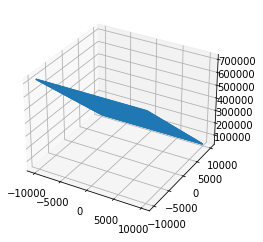

In [75]:
plothiper = plt.figure()
grafico = plothiper.gca(projection='3d')

x1g = np.linspace(-10000,10000,100)
x2g = np.linspace(-10000,10000,100)

XG, YG = np.meshgrid(x1g, x2g)
Z = betas[0] + XG*betas[1] + YG*betas[2]

# grafico = plt.axes(projection='3d')

grafico.plot_wireframe(XG,YG,Z)
plt.show()

## e) Calcule os valores estimados de y (ou seja, ŷ) através do hiperplano estimado no item anterior.

In [76]:
yChapeu = []

for i in range(x1_csv.shape[0]):
    yChapeu.append(betas[0] + betas[1]*x1[i] + betas[2]*x2[i])

print(yChapeu)

[8553048.574465377, 8195764.257605064, 2260066.46854021, 1928215.174873412, 1622594.3446054815, 1587549.0772222509, 1539737.4285285296, 1272837.4503720517, 1210985.8864749412, 1110872.96405924, 1089311.0032118554, 1027909.2701583904, 990394.7338532661, 957667.4823214859, 923334.2328944221, 886153.9512768479, 856361.0377197794, 856174.0896707018, 849511.5680891614, 773636.4996643886, 757622.4471574121, 748552.7923003453, 718486.9765776431, 716922.155609022, 716323.6738705651, 687764.8110528167, 682756.2053676103, 655099.9721329521, 668767.0821330617, 644267.2874467038, 632127.2325833297, 637576.2386041449, 629437.0722584984, 628894.1341526768, 628054.0592977868, 606099.0495339303, 599900.5676243991, 592663.5259903199, 595742.4331554323, 588186.0344755331, 578427.6451357949, 568698.077261627, 567713.6156803903, 566393.4797725605, 561827.3305150996, 556946.7882934604, 552885.85000026, 548553.2702377135, 539776.1050137959, 542350.285313483, 536614.2085778445, 529893.9985877636, 528027.5986

## f) Calcule os resíduos, ou seja, o erro de estimação y-ŷ.

In [77]:
residuos = []

for i in range(x1_csv.shape[0]):
    residuos.append(y[i]-yChapeu[i])

print(residuos)

[835162.4255346227, -5222574.257605064, 6887353.53145979, -116645.17487341189, -851714.3446054815, 6770590.92277775, -628967.4285285296, -1142667.4503720517, 15165884.11352506, 833077.03594076, -724756.0032118554, -27909.270158390398, -692224.7338532661, 37782.51767851412, -613264.2328944221, 1380896.0487231521, -86731.03771977942, 772375.9103292982, -500951.5680891614, -262746.4996643886, -515692.44715741207, -200995.79230034526, -424346.9765776431, 168877.844390978, 496766.32612943486, -34474.81105281669, -113616.20536761032, -557869.9721329521, 440732.9178669383, -145467.28744670376, -432317.23258332966, 2099113.761395855, 1752302.9277415015, 1136153.865847323, -48734.05929778679, -171779.04953393026, 52959.43237560091, -286433.5259903199, 8497767.566844568, -141886.03447553306, 1571262.3548642052, -143298.07726162695, 712286.3843196097, 680306.5202274395, -233277.33051509957, 229433.21170653962, -325345.85000026005, -20583.27023771347, -396426.1050137959, 339699.714686517, 45180.79

## g) Faça o histograma dos erros de estimação encontrados no item anterior. Comente sobre sua característica.

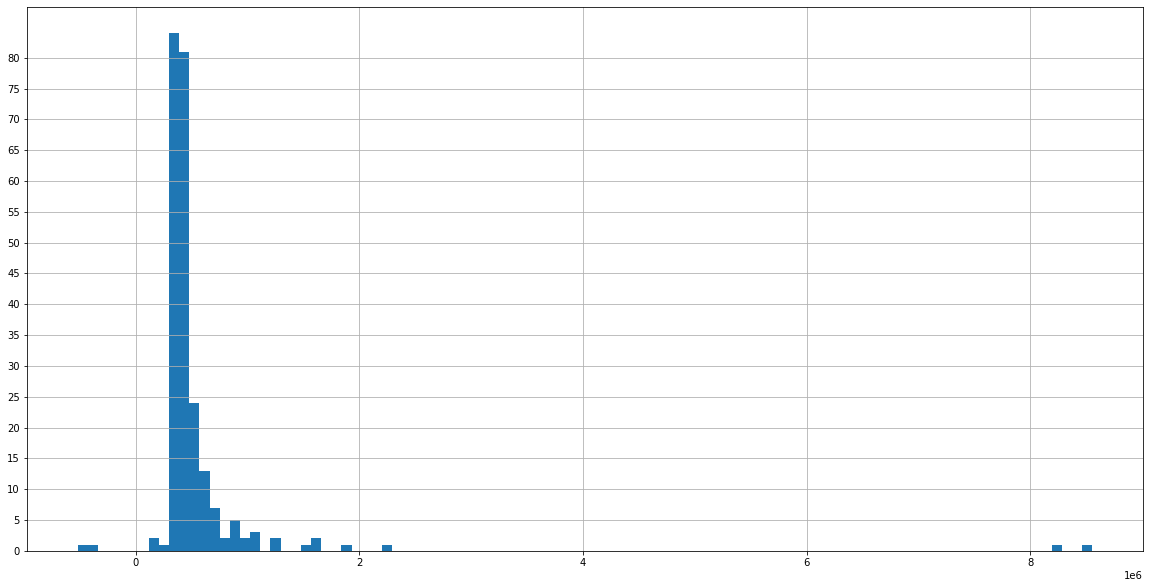

In [78]:
fig, axe = plt.subplots(figsize=(20,10))
plt.hist(yChapeu, bins=100)
plt.grid(True)
# plt.xticks(np.arange(-400000, 900000, 100000))
plt.yticks(np.arange(0, 85, 5))
plt.show()

Podemos observar no histograma dos erros uma distruibuição normal e concentrada, onde a maioria dos erros está muito próxima a um mesmo valor, isso mostra que o ajuste tende a estar bem alinhado e centralizado quanto as valores reais.